**선형회귀**

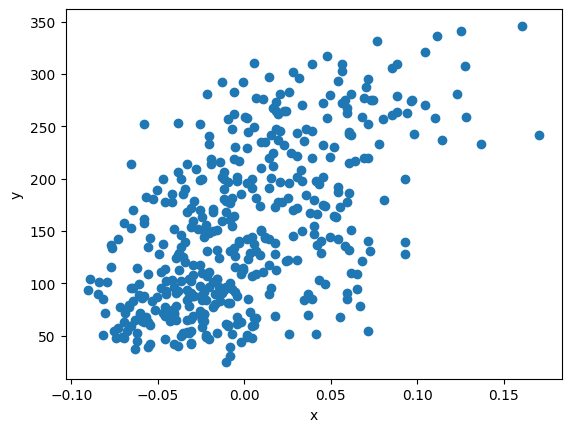

In [1]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

dibt = load_diabetes()
plt.scatter(dibt.data[:,2], dibt.target) # 단순선형회귀로 해보기 위해 데이터의 2번째 특성만 사용
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
x = dibt.data[:,2]
y = dibt.target
print(x.shape, y.shape)

(442,) (442,)


In [3]:
w = 1.0 # 가중치
b = 1.0 # 절편 (바이어스)
y_hat = w * x + b
print(y_hat)

[1.06169621 0.94852594 1.04445121 0.98840499 0.96361531 0.95930406
 0.95283719 0.99810529 1.06169621 1.03906215 0.91619158 1.01750591
 0.97115999 0.99810529 0.97439343 0.98193811 1.04229559 1.01211685
 0.9894828  0.98193811 0.94313688 0.97762686 0.99594967 1.06061839
 1.03582872 0.98732717 0.92265845 1.05954058 0.97870468 0.99379405
 1.04445121 0.93451438 1.12528712 0.94960375 0.93667001 0.96900437
 1.02289497 1.01103904 1.07139652 1.01427248 0.99163842 0.93235876
 0.9894828  0.97654905 1.06816308 0.96469312 0.98840499 0.9269697
 0.95822625 1.01427248 0.99271623 1.0164281  0.99056061 0.98409374
 1.0250506  0.95068156 1.04121778 0.93667001 0.93559219 0.97439343
 0.99594967 1.00457217 0.99271623 0.9625375  0.97439343 0.97547124
 0.98193811 0.98517155 0.97008218 0.953915   0.93020313 1.03367309
 0.99594967 0.97978249 1.00241654 0.96900437 1.02828403 0.96361531
 0.94205907 0.9625375  1.01211685 0.97762686 0.96469312 1.00996123
 0.96038187 1.07139652 0.92481407 0.99379405 0.95930406 0.95175

In [4]:
y_hat = x[0] * w + b # y의 첫번째 값을 예측해보고자 x의 첫번째 값을 넣음
print(y_hat)
print(y[0])

1.0616962065186832
151.0


In [5]:
# w값을 조정해보자
w, b = 1.0, 1.0
for x_i, y_i in zip(x, y):
  #print(x_i, y_i)
  y_hat = x_i * w + b
  err = y_i - y_hat
  w = w + x_i * err
  b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


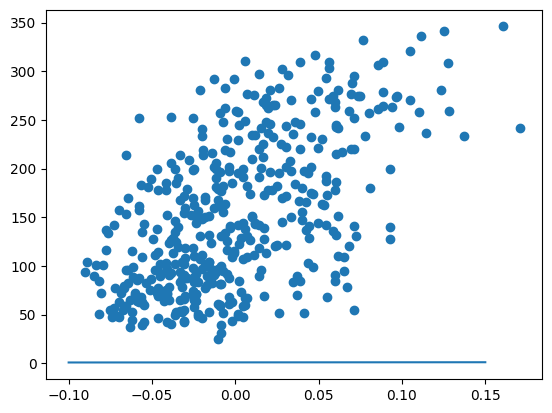

In [6]:
# w를 한번 변화 시켰을 때 절편이 어떻게 달라지는지 확인
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * 1.0 + 1.0)
pt2 = (0.15, 0.15 * 1.0 + 1.0)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()

0 587.8654539985616 99.4093556453094


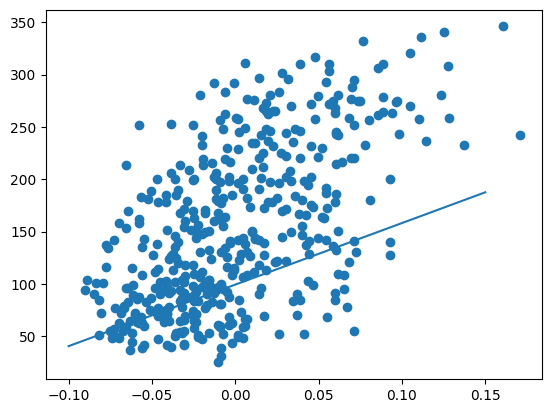

1 796.8938154365641 114.80085167129954


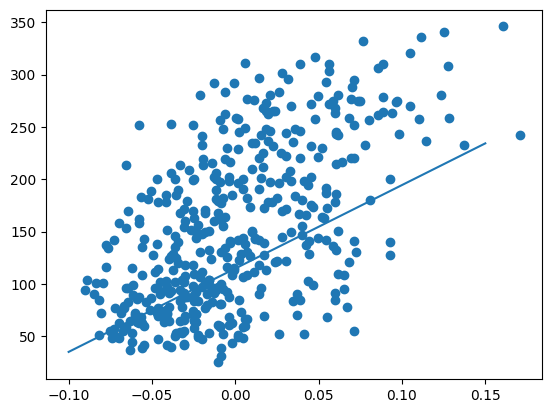

2 871.7846906737017 120.31533114511586


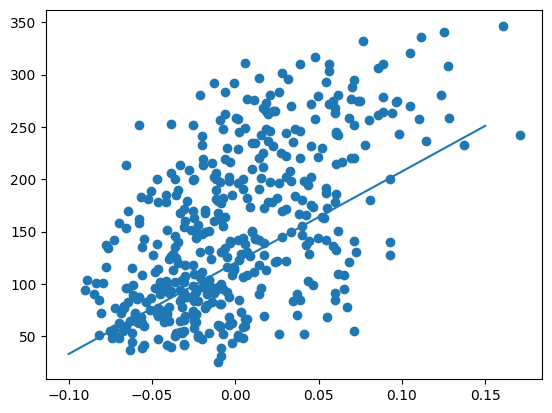

3 898.6166629247405 122.2910639663954


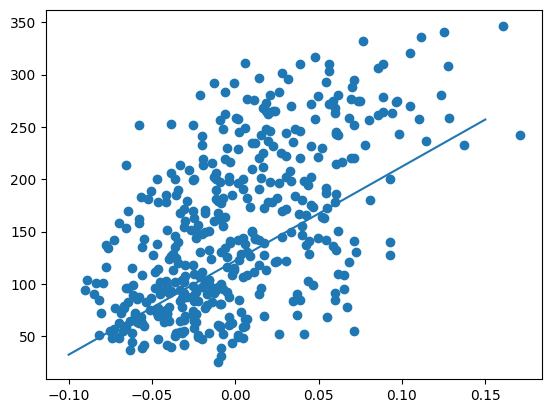

4 908.230046833004 122.99893135435386


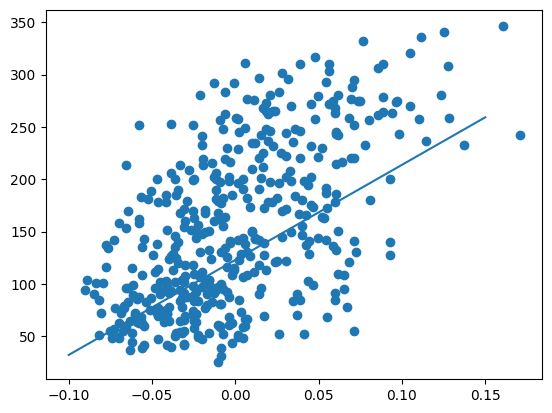

5 911.6743389373271 123.25254673875116


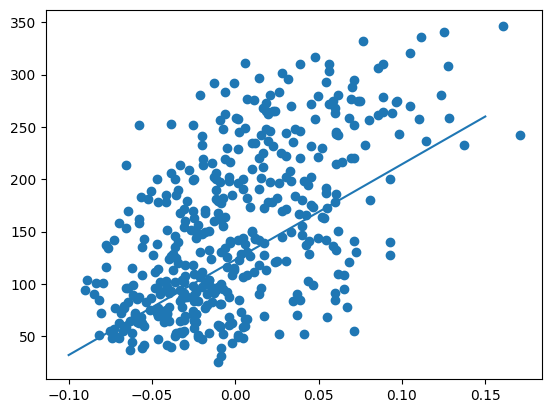

6 912.9083631074952 123.34341229393446


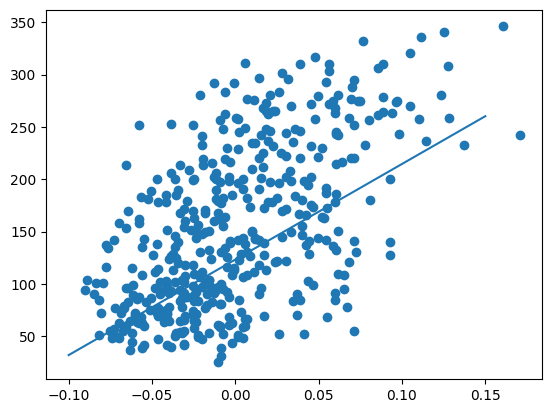

7 913.3504904319025 123.37596768933525


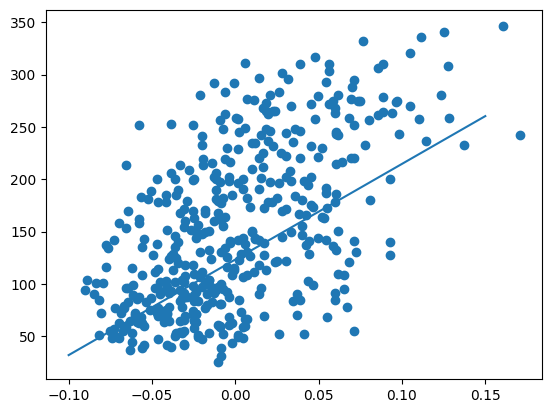

8 913.5088962198208 123.38763166659876


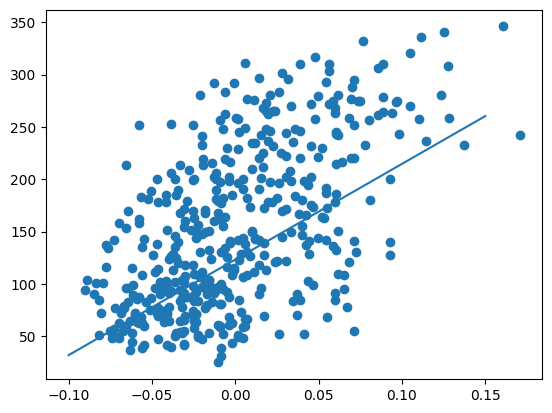

9 913.5656499924592 123.39181064719266


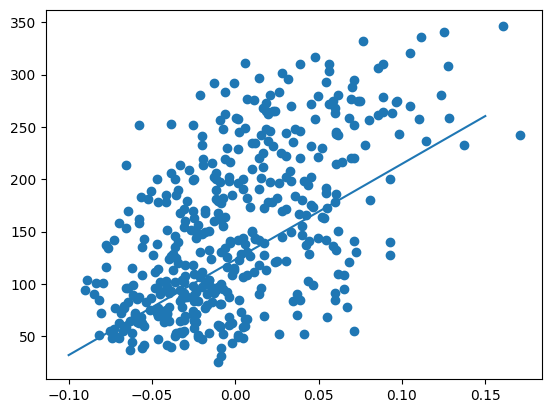

In [7]:
w, b = 1.0, 1.0
for epoch in range(10):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b # 예측
    err = y_i - y_hat # 실제 값과 예측값 사이의 오차(error)
    # 경사 하강법(Gradient Descent)
    w = w + x_i * err
    b = b + 1 * err
  print(epoch, w, b)
  plt.scatter(x,y) # 원본 데이터를 산점도로 그림
  # 직선의 두 점을 계산
  pt1 = (-0.1, -0.1 * w + b) # x값이 -0.1일 경우 y 값
  pt2 = (0.15, 0.15 * w + b) # x값이 0.15일 경우 y 값
  plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]]) # 선형 회귀 직선을 그림
  plt.show()

**로지스틱 회귀**

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(bc.data,
                                                    bc.target,
                                                    stratify=bc.target,
                                                    random_state=7)
print(x_train.shape, y_test.shape)

(426, 30) (143,)


In [9]:
# 스케일 조정
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
scaler.fit(x_train)
x_train_zs = scaler.transform(x_train)
x_test_zs = scaler.transform(x_test)

bc_lr = LogisticRegression(max_iter=100) # 몇번 수행
bc_lr.fit(x_train_zs, y_train)
pred = bc_lr.predict(x_test)
print(accuracy_score(y_test, pred))

0.3706293706293706


In [10]:
# 소프트맥스(softmax) 회귀, 즉 다중 클래스 로지스틱 회귀(multinomial logistic regression)
# 클래스가 3개 이상인 경우 사용 iris는 클래스 3개
from sklearn.datasets import load_iris
iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    stratify=iris.target,
                                                    random_state=7,
                                                    test_size=0.3)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_zs = scaler.transform(x_train)
x_test_zs = scaler.transform(x_test)

iris_lr = LogisticRegression(max_iter=100, multi_class='multinomial')
iris_lr.fit(x_train_zs, y_train)
pred = iris_lr.predict(x_test_zs)
print(accuracy_score(y_test, pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9777777777777777


**diabetes 데이터 활용하기**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib

In [12]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import pandas as pd
rootdir = '/content/drive/MyDrive/2025_SeSAC/machine_learning/data/'
diabetes = pd.read_csv(rootdir+'diabetes.csv',sep=',')

In [82]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [83]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
diabetes.shape

(768, 9)

In [85]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [87]:
numeric_columns = diabetes.columns[:-1]
numeric_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

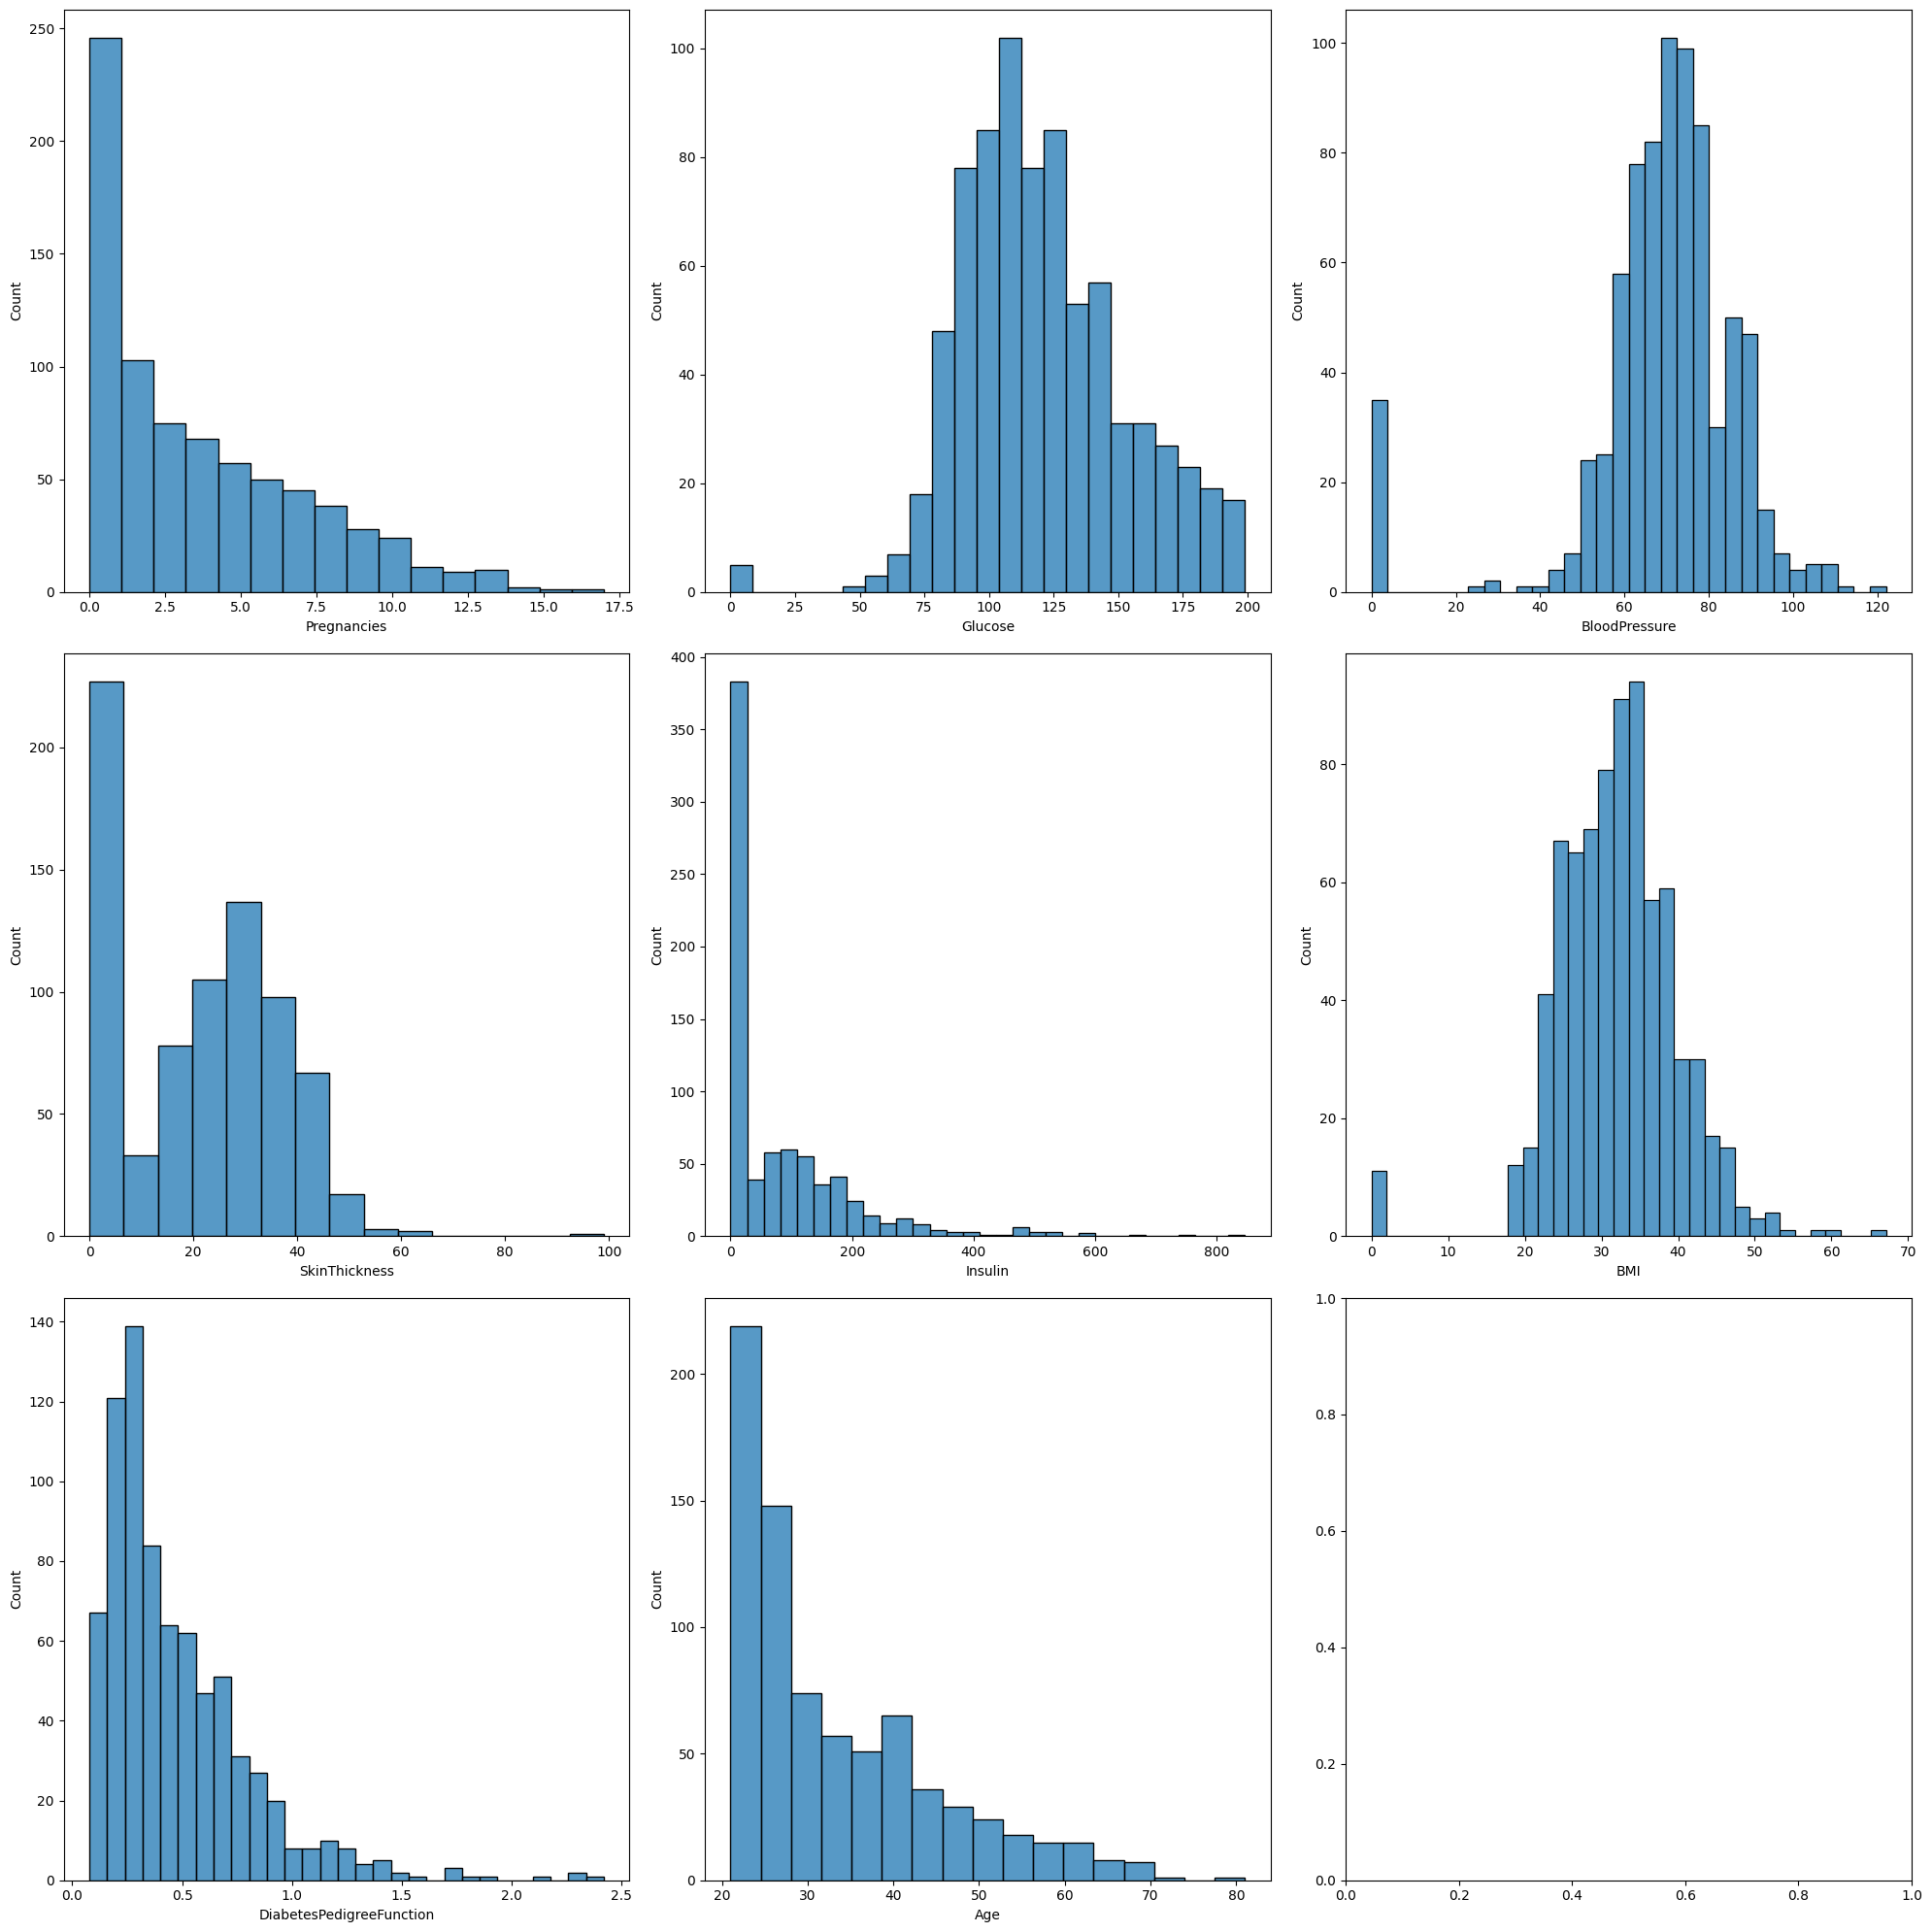

In [88]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
  sns.histplot(data=diabetes, x=column, ax=axes[i])

plt.tight_layout()
plt.show()

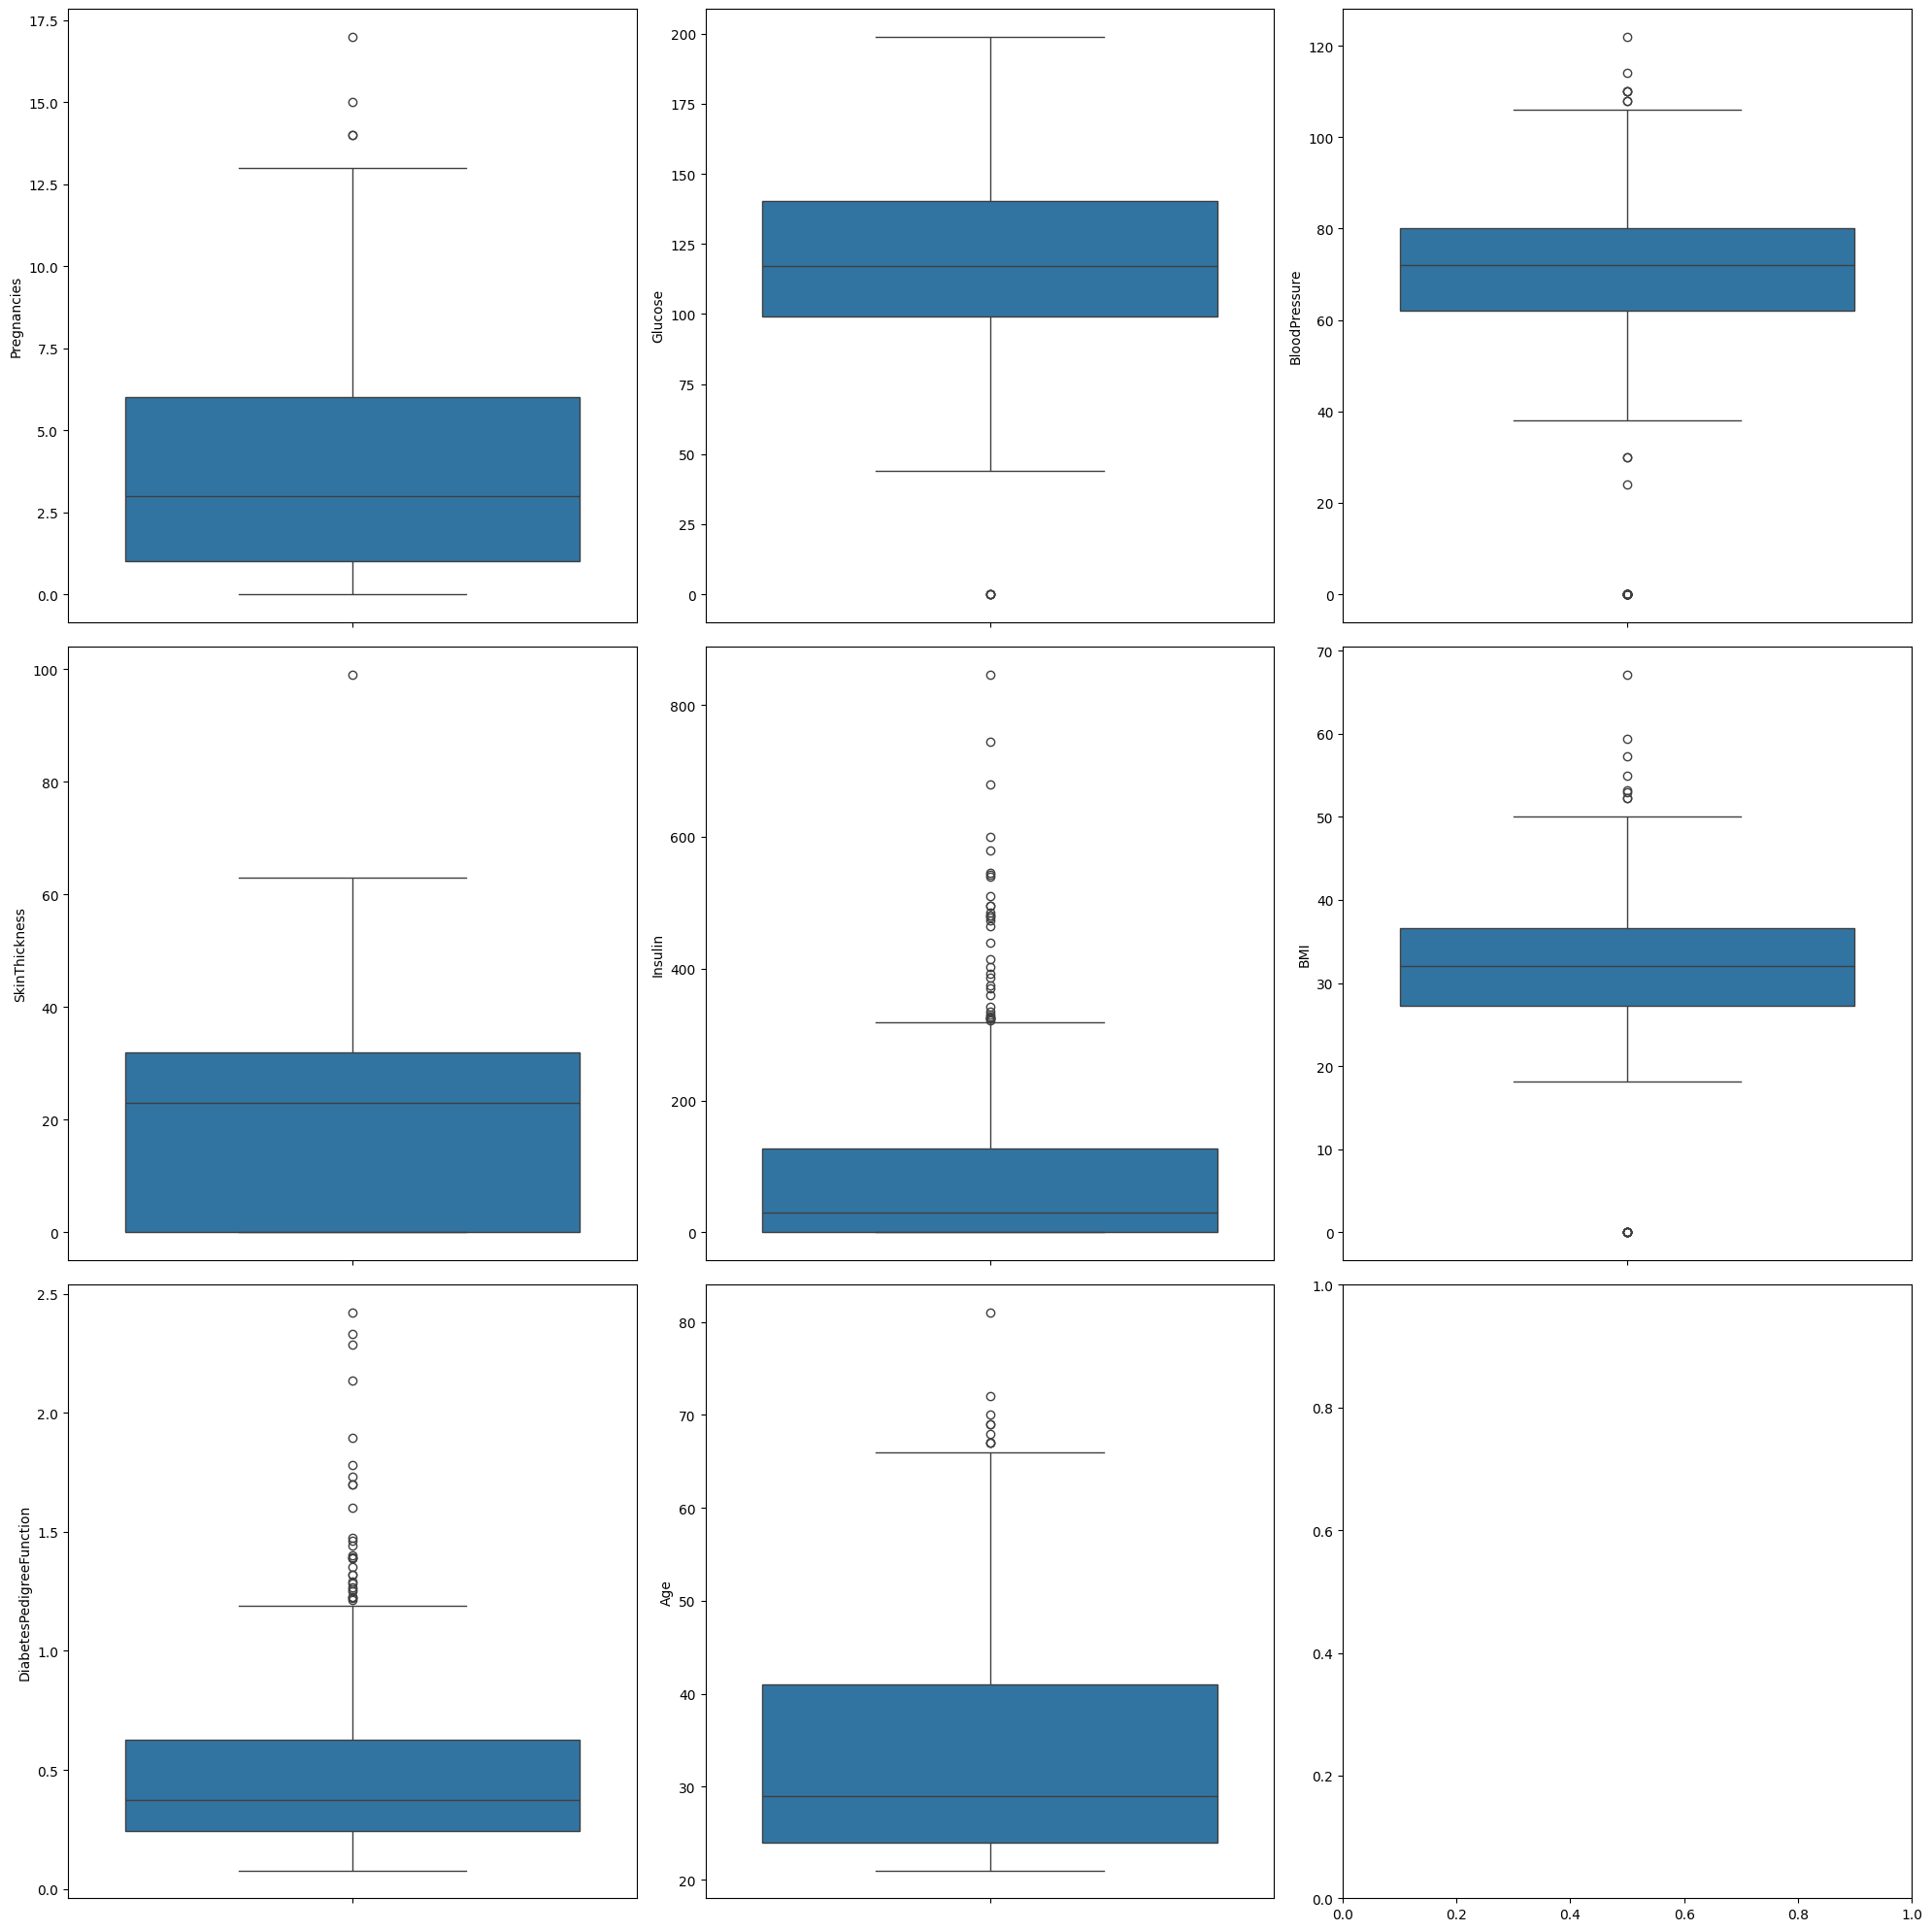

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
  sns.boxplot(data=diabetes, y=column, ax=axes[i])

plt.tight_layout()
plt.show()

In [90]:
diabetes[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [112]:
(diabetes['Glucose'] == 0).sum()

np.int64(5)

In [113]:
diabetes[diabetes['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [114]:
(diabetes['BloodPressure'] == 0).sum()

np.int64(35)

In [115]:
diabetes[diabetes['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [116]:
(diabetes['BMI'] == 0).sum()

np.int64(11)

In [117]:
(diabetes['Insulin'] == 0).sum()

np.int64(374)

In [119]:
# 평균으로 대체할 컬럼 정의
mean_cols = ['Glucose', 'BloodPressure', 'BMI']

# 경고 방지를 위해 모두 float형으로 변환
diabetes[mean_cols] = diabetes[mean_cols].astype(float)

# 평균으로 대체
for col in mean_cols:
    mean_val = diabetes[diabetes[col] != 0][col].mean()
    diabetes.loc[diabetes[col] == 0, col] = mean_val

In [120]:
import numpy as np

# 1. 0을 NaN으로 변환
diabetes['Insulin'] = diabetes['Insulin'].replace(0, np.nan)

# 2. 로그 변환 (NaN은 유지됨)
diabetes['Insulin_log'] = np.log1p(diabetes['Insulin'])

# 3. 중앙값 계산 (NaN 제외)
median_log = diabetes['Insulin_log'].median()

# 4. 결측치 채우기
diabetes['Insulin_log'] = diabetes['Insulin_log'].fillna(median_log)

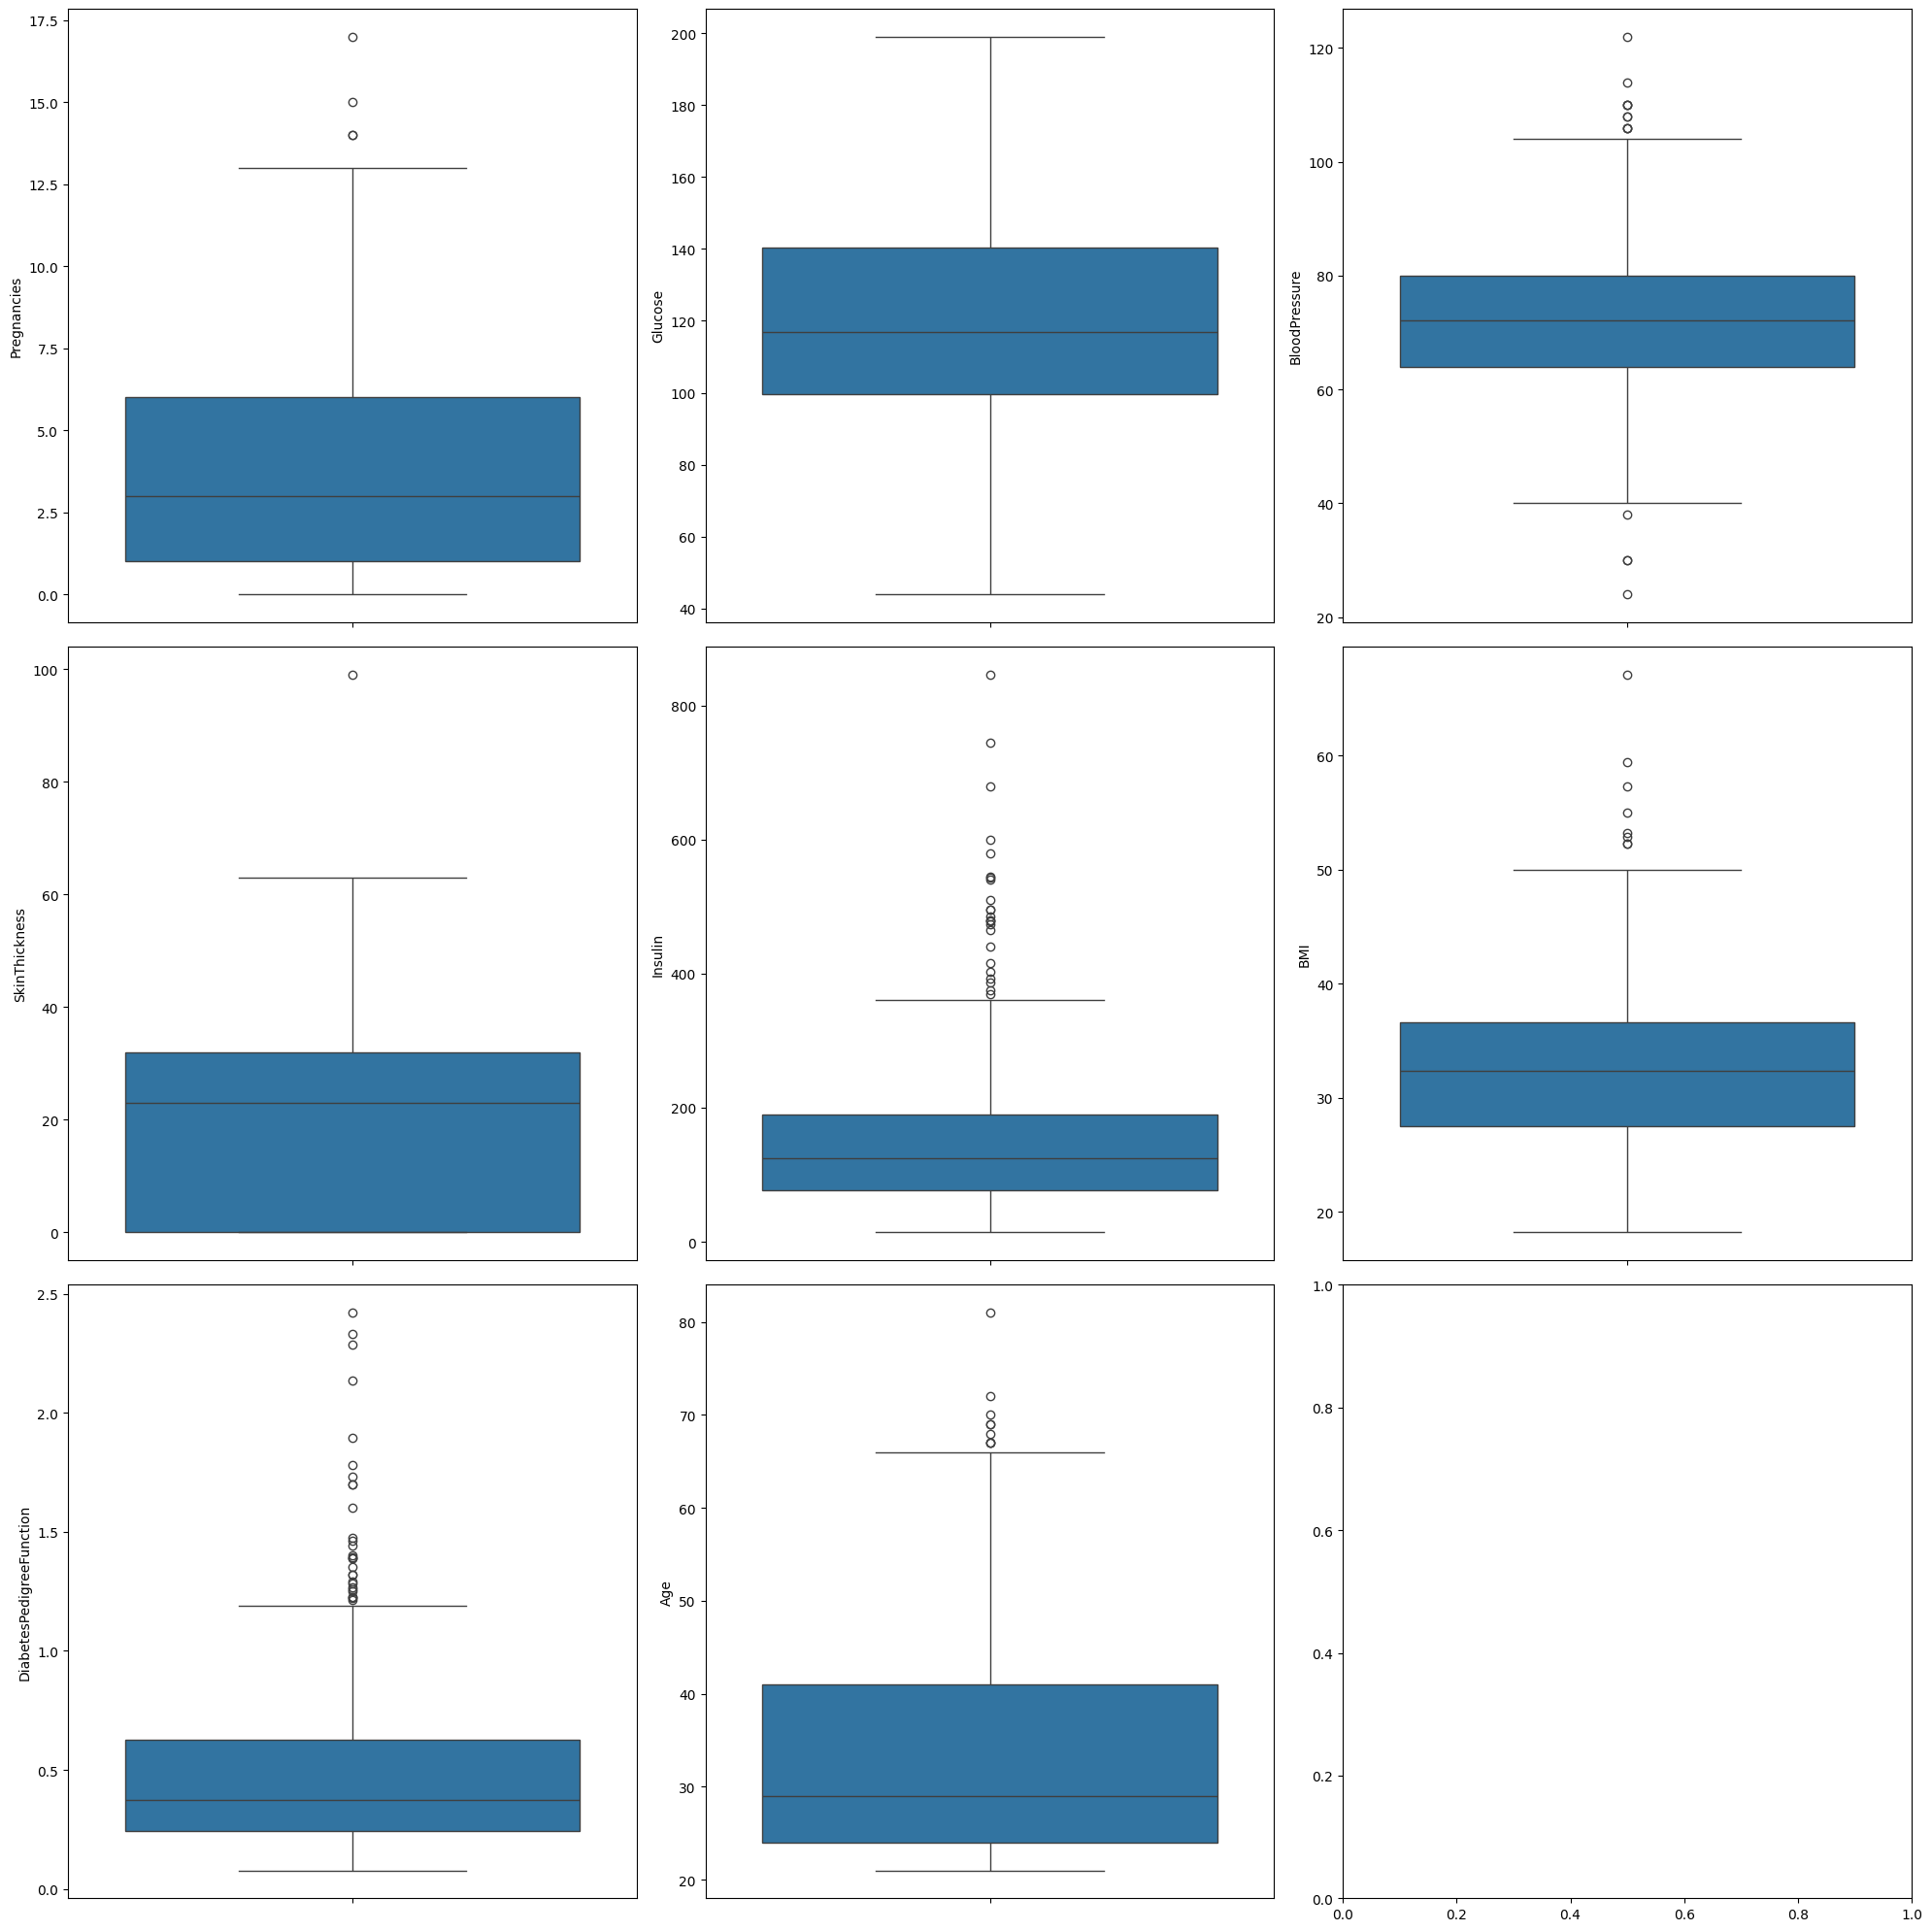

In [121]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                   'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
  sns.boxplot(data=diabetes, y=column, ax=axes[i])

plt.tight_layout()
plt.show()

In [122]:
print(diabetes.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Insulin_log                   0
dtype: int64


In [123]:
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=7)
print(x_train.shape, y_test.shape)

(576, 9) (192,)


In [124]:
diabetes.shape

(768, 10)

In [125]:
# 시그모이드
from sklearn.impute import SimpleImputer

# 결측값 처리
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# 표준화
scaler = StandardScaler()
x_train_zs = scaler.fit_transform(x_train_imputed)
x_test_zs = scaler.transform(x_test_imputed)

diabetes_lr = LogisticRegression(max_iter=100)
diabetes_lr.fit(x_train_zs, y_train)
pred = diabetes_lr.predict(x_test_zs)
print(accuracy_score(y_test, pred))

0.7760416666666666


In [126]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_diabetes

X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=7)

# 결측값 처리
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

param_grid = [
    {
        'model': [LogisticRegression()],
        'model__max_iter': [1000],
    },
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100],
        'model__max_depth': [1, 5, 10]
    },
    {
        'model': [AdaBoostClassifier()],
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.5, 1.0]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7]
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [1, 5, 10],
        'model__min_samples_split': [2, 5]
    }
]

# GridSearchCV 정확도(accuracy)를 기준으로 가장 성능 좋은 조합 찾기, n_jobs=-1로 병렬 처리하여 속도 높임
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression()],
                          'model__max_iter': [1000]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [1, 5, 10],
                          'model__n_estimators': [50, 100]},
                         {'model': [AdaBoostClassifier()],
                          'model__learning_rate': [0.5, 1.0],
                          'model__n_estimators': [50, 100]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [3, 5, 7]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [1, 5, 10],
                          'model__min_samples_split': [2, 5]}],
             scoring='accuracy')

In [127]:
grid.best_params_, grid.best_score_

({'model': LogisticRegression(), 'model__max_iter': 1000},
 np.float64(0.757016491754123))